In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing as p
import seaborn as sns
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import radientBoostingClassifier

Load Dataset

In [4]:
churn = pd.read_csv("C:/Users/Ameyaveer Singh/OneDrive/Desktop/Machine learning/ML Project/ML project datasets/Customer-Churn-Records.csv")

Inspect Dataset

In [5]:
churn.info()
churn.isnull().sum() #Check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [4]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


## EDA

Making a copy of the dataset for EDA

In [6]:
churn_copy = churn.copy()

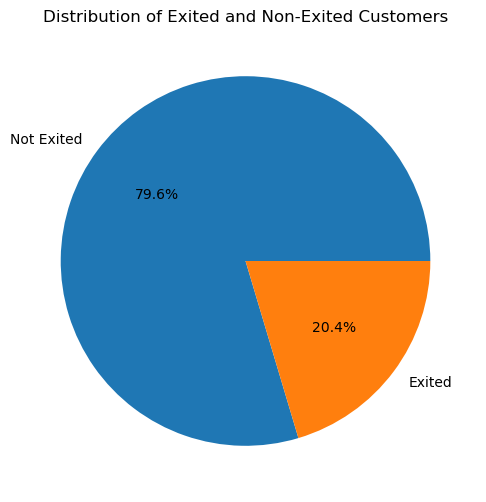

In [6]:
plt.figure(figsize=(10, 6))

#1 is 'Exited' and 0 is 'Not Exited'
exited_labels = ['Not Exited', 'Exited']
card_type_counts = churn_copy['Exited'].value_counts()

plt.pie(card_type_counts, labels=exited_labels, autopct='%1.1f%%')
plt.title('Distribution of Exited and Non-Exited Customers')
plt.show()


Shows unequal distribution of dependent variable 'Exited'.

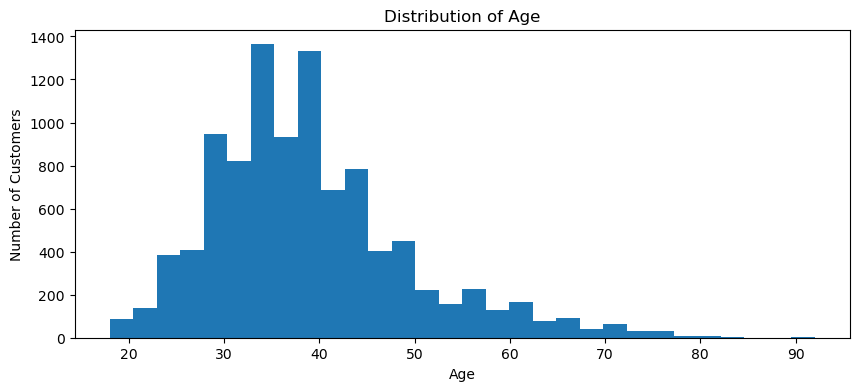

In [7]:
plt.figure(figsize =(10,4))
plt.hist(churn_copy['Age'], bins=30)
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Distribution of Age')
plt.show()

The bank has customers between age 26-45 the most

This age group represents the working population and individuals who are likely to have banking needs such as loans, mortgages, and investments.

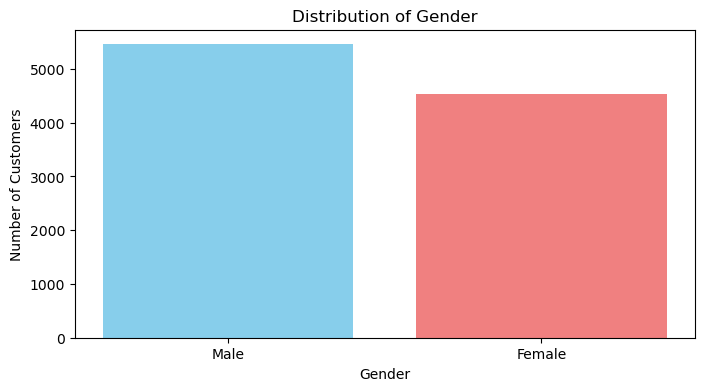

In [8]:
plt.figure(figsize=(8, 4))

gender_counts = churn_copy['Gender'].value_counts()
colors = ['skyblue', 'lightcoral']  

plt.bar(gender_counts.index, gender_counts.values, color=colors)
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.title('Distribution of Gender')
plt.show()


Equal distribution of males and females as customers.

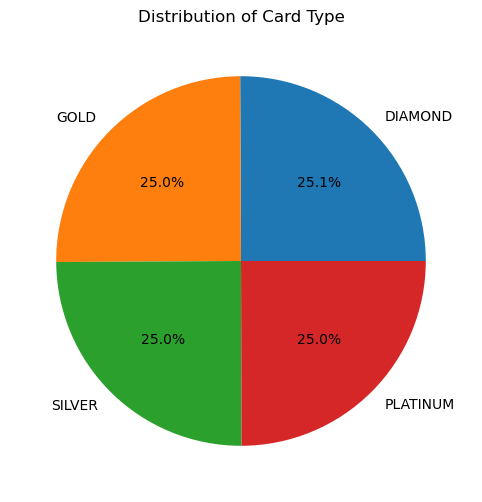

In [9]:
plt.figure(figsize =(10,6))

card_type_counts = churn_copy['Card Type'].value_counts()
plt.pie(card_type_counts, labels=card_type_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Card Type')
plt.show()

Almost all the card types have equal share of customers.
This indicates that customers have diverse preferences, and the bank has effectively marketed and provided options for different card types to cater to customer needs.

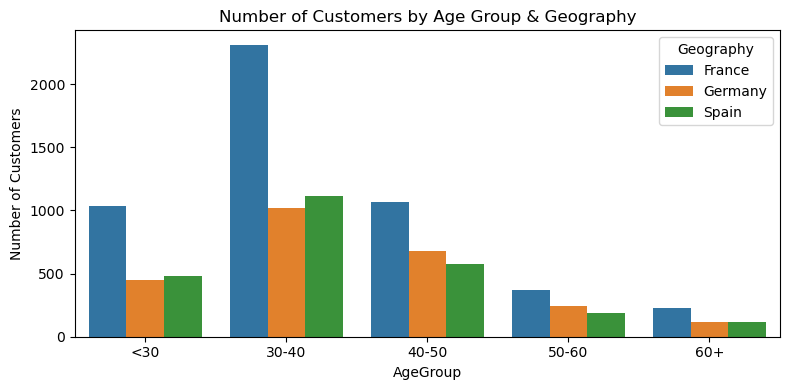

In [12]:
# Cut the Age variable into AgeGroup
churn_copy['AgeGroup'] = pd.cut(churn_copy['Age'], bins=[0, 30, 40, 50, 60, np.inf], labels=['<30', '30-40', '40-50', '50-60', '60+'])

# Group by Geography and AgeGroup and calculate the number of customers
No_of_customers_geo_age = churn_copy.groupby(['Geography', 'AgeGroup']).size().reset_index(name='No_of_customers_geo_age')

# Plot the barplot
plt.figure(figsize=(8, 4))
sns.barplot(data=No_of_customers_geo_age, x='AgeGroup', y='No_of_customers_geo_age', hue='Geography')
plt.xlabel('AgeGroup')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Age Group & Geography')

plt.tight_layout()
plt.show()

warnings.simplefilter(action='ignore', category=FutureWarning)

Majority customers of the bank come from france from the age groups of 30-40 year olds. 

In [13]:
print('Minimum Salary:', churn_copy.EstimatedSalary.min())
print('Maximum Salary:', churn_copy.EstimatedSalary.max())
print('Median Salary:', churn_copy.EstimatedSalary.median())

Minimum Salary: 11.58
Maximum Salary: 199992.48
Median Salary: 100193.915


Half of the customers have salary more than $ 100193.915.
This indicates that the bank has a significant portion of high-income customers, which could be attributed to targeted marketing strategies or the bank's positioning in the market.

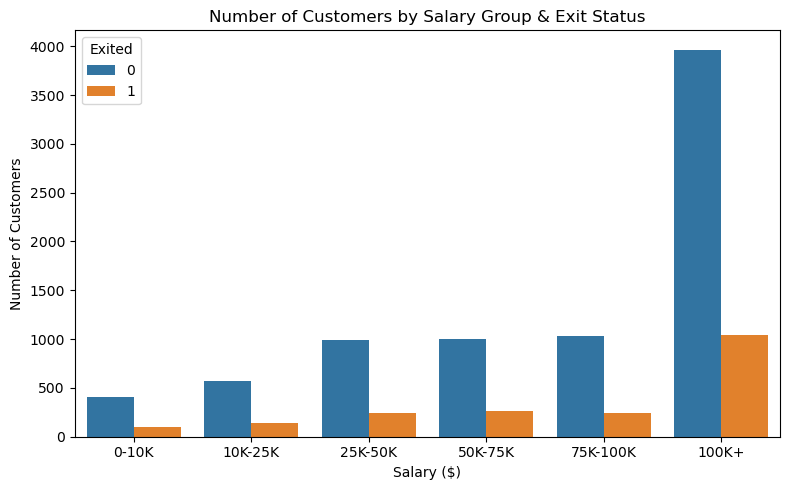

In [14]:
salary_bins = [0, 10000, 25000, 50000, 75000, 100000, 200000]
sal_labels = ['0-10K', '10K-25K', '25K-50K', '50K-75K', '75K-100K', '100K+']

churn_copy['Salary Group'] = pd.cut(churn_copy['EstimatedSalary'], bins=salary_bins, labels=sal_labels)

# Aggregate number of customers by Salary Group and Exit Status
No_of_customers_Sal_Exited = churn_copy.groupby(['Salary Group', 'Exited']).size().reset_index(name='No. of customers')

# Sort the aggregated data by the number of customers in ascending order
No_of_customers_Sal_Exited_sorted = No_of_customers_Sal_Exited.sort_values(by='No. of customers', ascending=False)

# Create the grouped bar chart
plt.figure(figsize=(8,5))
sns.barplot(data=No_of_customers_Sal_Exited_sorted ,x='Salary Group', y='No. of customers', hue='Exited',)
plt.xlabel('Salary ($)')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Salary Group & Exit Status')

plt.tight_layout()
plt.show()

warnings.simplefilter(action='ignore', category=FutureWarning)

Shows that customers with higher salaries have a lower tendency to churn or leave the bank.

Causes:

The bank provides better deals and offers to customers with higher incomes, making them less likely to switch to another bank.

Customers with higher salaries often have stronger financial stability and purchasing power, leading to a higher level of engagement with the bank.

The bank may have assigned dedicated relationship managers to high-income clients, providing personalized assistance and building strong connections that enhance trust and satisfaction.

Churn Rate By Gender:
Gender
Female    25%
Male      16%
Name: Exited, dtype: object



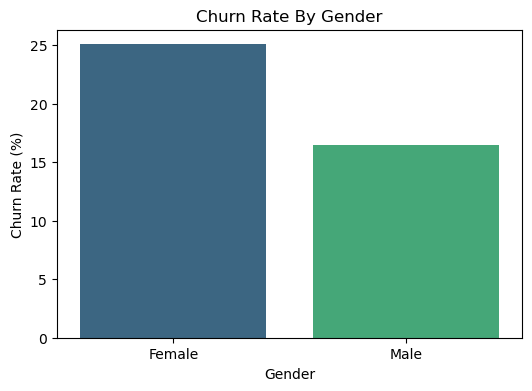

In [15]:
churn_rate_gender = churn_copy.groupby('Gender')['Exited'].mean() * 100
print("Churn Rate By Gender:")
print(churn_rate_gender.apply(lambda x: "{:.0f}%".format(x)))
print()

# Churn rate by gender
plt.figure(figsize=(6, 4))
sns.barplot(x=churn_rate_gender.index, y=churn_rate_gender.values, palette="viridis")
plt.title('Churn Rate By Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate (%)')
plt.show()

warnings.simplefilter(action='ignore', category=FutureWarning)

This shows that females have a higher churn rate then males, this may be beacause product offerings or features are influenced by gender-specific preferences, potentially leading to a mismatch between the company's services and the expectations of the female demographic. Additionally, targeted marketing strategies may impact customer satisfaction differently across genders.

Churn Rate By Geography:
Geography
France     16%
Germany    32%
Spain      17%
Name: Exited, dtype: object



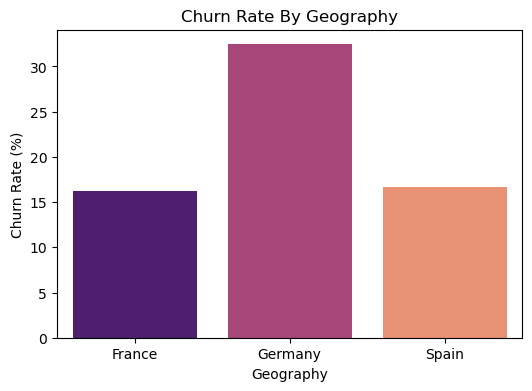

In [16]:
churn_rate_geography = churn_copy.groupby('Geography')['Exited'].mean() * 100
print("Churn Rate By Geography:")
print(churn_rate_geography.apply(lambda x: "{:.0f}%".format(x)))
print()

# Churn rate by geography
plt.figure(figsize=(6, 4))
sns.barplot(x=churn_rate_geography.index, y=churn_rate_geography.values, palette="magma")
plt.title('Churn Rate By Geography')
plt.xlabel('Geography')
plt.ylabel('Churn Rate (%)')
plt.show()

warnings.simplefilter(action='ignore', category=FutureWarning)

Germany has the highest churn rate followed by france and spain, even though france has the highest number of customers. This may be because marketing strategies used in germany are not very effective or that customer service is not up to mark compared to other countries. 

Churn Rate By Age:
AgeGroup
<30       8%
30-40    12%
40-50    34%
50-60    56%
60+      25%
Name: Exited, dtype: object



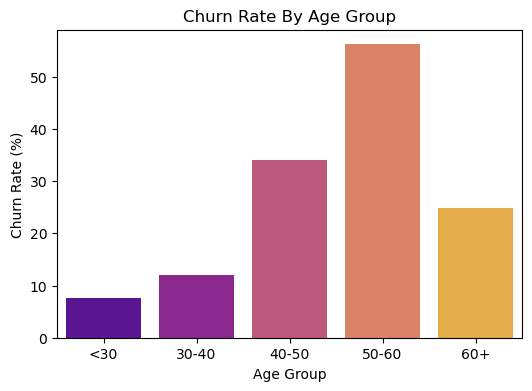

In [17]:
churn_copy['AgeGroup'] = pd.cut(churn_copy['Age'], bins=[0, 30, 40, 50, 60, np.inf], labels=['<30', '30-40', '40-50', '50-60', '60+'])
churn_rate_age = churn_copy.groupby('AgeGroup')['Exited'].mean() * 100
print("Churn Rate By Age:")
print(churn_rate_age.apply(lambda x: "{:.0f}%".format(x)))
print()

# Churn rate by age group
plt.figure(figsize=(6, 4))
sns.barplot(x=churn_rate_age.index, y=churn_rate_age.values, palette="plasma")
plt.title('Churn Rate By Age Group')
plt.xlabel('Age Group')
plt.ylabel('Churn Rate (%)')
plt.show()

warnings.simplefilter(action='ignore', category=FutureWarning)

Traditionally, older customers are considered more loyal and stable in their banking relationships but contradictory to popular believe, older age groups (40-50 and 50-60) have a higher churn rate for this bank, this indicates that the bank is failing at retaining its older poplulation of customers. This may be because of lack of service adaptation, technological accessibility issues, competition with more attractive offerings, and the need for improved communication and customer support tailored to the preferences of older individuals.

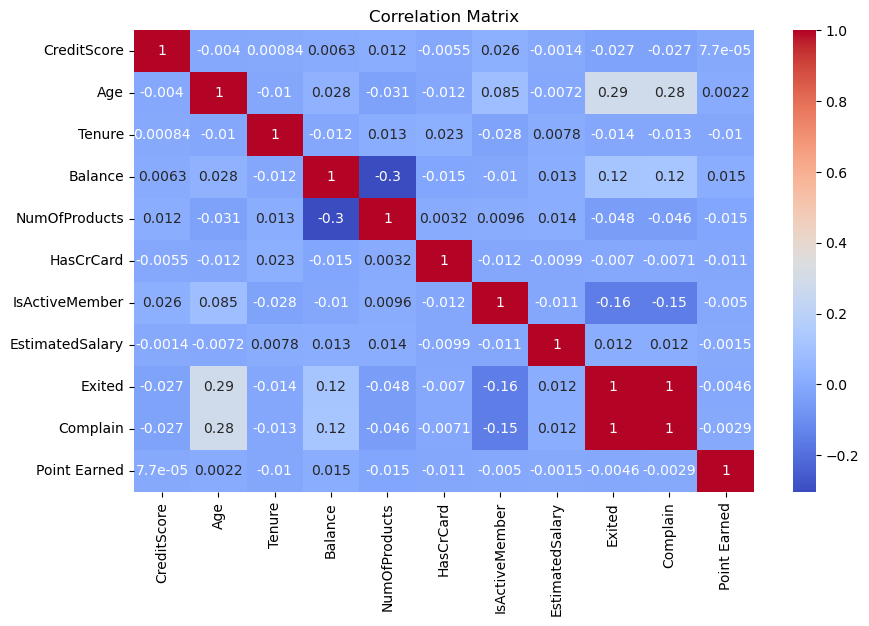

In [18]:
numerical_features = churn_copy[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts','HasCrCard','IsActiveMember', 'EstimatedSalary', 'Exited','Complain','Point Earned']]

# Compute the correlation matrix
corr_matrix = numerical_features.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize =(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Clustering - K-means

Creating a copy of the datset for clustering

In [19]:
churn_copy_2 = churn.copy()

In [20]:
# Droping non-meaningful varibales and 'complain' as it has a 100% correlation with target variable - exited 
churn_copy_2.drop(columns=['RowNumber', 'CustomerId', 'Surname'],axis=1,inplace=True)
churn_copy_2.drop(['Complain'],axis=1,inplace=True)
# Droping label variable
churn_copy_2.drop(['Exited'],axis=1,inplace=True)

Encoding Categorical Variables

In [21]:
churn_copy_2 = pd.get_dummies(churn_copy_2, columns=['Geography', 'Gender', 'Card Type'])
churn_copy_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Age                 10000 non-null  int64  
 2   Tenure              10000 non-null  int64  
 3   Balance             10000 non-null  float64
 4   NumOfProducts       10000 non-null  int64  
 5   HasCrCard           10000 non-null  int64  
 6   IsActiveMember      10000 non-null  int64  
 7   EstimatedSalary     10000 non-null  float64
 8   Satisfaction Score  10000 non-null  int64  
 9   Point Earned        10000 non-null  int64  
 10  Geography_France    10000 non-null  bool   
 11  Geography_Germany   10000 non-null  bool   
 12  Geography_Spain     10000 non-null  bool   
 13  Gender_Female       10000 non-null  bool   
 14  Gender_Male         10000 non-null  bool   
 15  Card Type_DIAMOND   10000 non-null  bool   
 16  Card 

Standardizing the dataset 

In [22]:
min_max_scaler = p.MinMaxScaler()
churn_norm = min_max_scaler.fit_transform(churn_copy_2)
print(churn_norm)

[[0.538      0.32432432 0.2        ... 0.         0.         0.        ]
 [0.516      0.31081081 0.1        ... 0.         0.         0.        ]
 [0.304      0.32432432 0.8        ... 0.         0.         0.        ]
 ...
 [0.718      0.24324324 0.7        ... 0.         0.         1.        ]
 [0.844      0.32432432 0.3        ... 1.         0.         0.        ]
 [0.884      0.13513514 0.4        ... 0.         0.         0.        ]]


Optimal value of k = 3, so make analysis easier by segmenting the whoel customer base into 3 parts. 

In [39]:
cno = 3
cno_arr = np.ones((cno))
kmeans = KMeans(init="random", n_clusters=cno, n_init=3, random_state=0).fit(churn_norm)
wss = kmeans.inertia_
print("WSS = ", wss) 

WSS =  21372.091638160044


Silhouette score = 0.14254847609662685


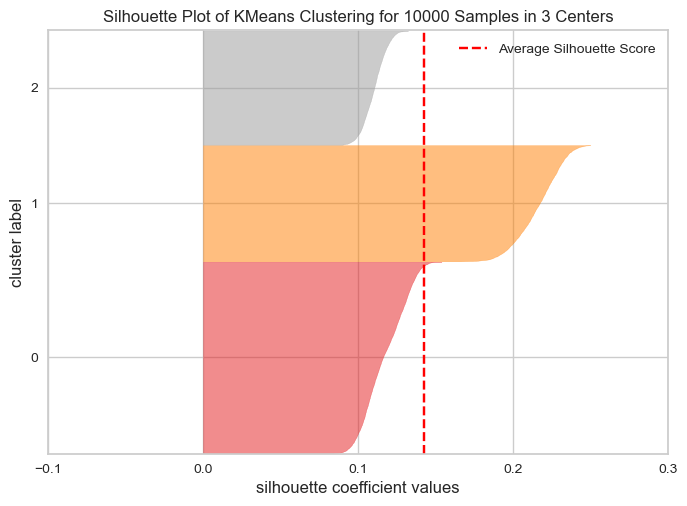

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 10000 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [37]:
labels = kmeans.labels_
score = silhouette_score(churn_norm, labels, metric='euclidean')
print("Silhouette score = {}".format(score))

visualizer = SilhouetteVisualizer(kmeans)
visualizer.fit(churn_norm)
visualizer.show()

In [24]:
churn_copy_2["Cluster_id"] = kmeans.labels_
churn_copy_2

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Satisfaction Score,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER,Cluster_id
0,619,42,2,0.00,1,1,1,101348.88,2,464,True,False,False,True,False,True,False,False,False,0
1,608,41,1,83807.86,1,0,1,112542.58,3,456,False,False,True,True,False,True,False,False,False,0
2,502,42,8,159660.80,3,1,0,113931.57,3,377,True,False,False,True,False,True,False,False,False,0
3,699,39,1,0.00,2,0,0,93826.63,5,350,True,False,False,True,False,False,True,False,False,0
4,850,43,2,125510.82,1,1,1,79084.10,5,425,False,False,True,True,False,False,True,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,300,True,False,False,False,True,True,False,False,False,1
9996,516,35,10,57369.61,1,1,1,101699.77,5,771,True,False,False,False,True,False,False,True,False,1
9997,709,36,7,0.00,1,0,1,42085.58,3,564,True,False,False,True,False,False,False,False,True,0
9998,772,42,3,75075.31,2,1,0,92888.52,2,339,False,True,False,False,True,False,True,False,False,2


In [42]:
functions = {
    'Cluster_id': ['count'],
    'CreditScore': ['mean', 'median', 'min', 'max'],
    'Age': ['mean', 'median', 'min', 'max'],
    'Tenure': ['mean', 'median', 'min', 'max'],
    'Balance': ['mean', 'median', 'min', 'max'],
    'NumOfProducts': ['mean', 'median', 'min', 'max'],
    'HasCrCard': ['mean', 'median', 'min', 'max'],
    'IsActiveMember': ['mean', 'median', 'min', 'max'],
    'EstimatedSalary': ['mean', 'median', 'min', 'max'],
    'Satisfaction Score': ['mean', 'median', 'min', 'max'],
    'Point Earned': ['mean', 'median', 'min', 'max'],
    'Geography_France': ['mean', 'median'],
    'Geography_Germany':  ['mean', 'median'],
    'Geography_Spain':  ['mean', 'median'],
    'Gender_Female': ['mean', 'median'],
    'Gender_Male': ['mean', 'median'],
    'Card Type_DIAMOND':  ['mean', 'median'],
    'Card Type_GOLD':  ['mean', 'median'],
    'Card Type_PLATINUM': ['mean', 'median'],
    'Card Type_SILVER':  ['mean', 'median'],
}

# Group by 'Cluster' and calculate the aggregations
cluster_statistics = churn_copy_2.groupby('Cluster_id').agg(functions)
cluster_statistics.reset_index(inplace=True)

# Display the result
print(cluster_statistics)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

  Cluster_id       CreditScore                         Age                 \
             count        mean median  min  max       mean median min max   
0          0  4543  650.831389  652.0  350  850  39.238389   38.0  18  85   
1          1  2753  650.064657  653.0  350  850  38.296404   37.0  18  92   
2          2  2704  650.492973  650.0  350  850  39.026627   37.0  18  88   

     Tenure                      Balance                              \
       mean median min max          mean      median  min        max   
0  4.966102    5.0   0  10  75659.369139   96147.550  0.0  238387.56   
1  5.049401    5.0   0  10  63546.284875   69413.440  0.0  212692.97   
2  5.053994    5.0   0  10  91048.615614  108732.335  0.0  250898.09   

  NumOfProducts                HasCrCard                IsActiveMember         \
           mean median min max      mean median min max           mean median   
0      1.544134    1.0   1   4  0.702619    1.0   0   1       0.502751    1.0   
1      1.5

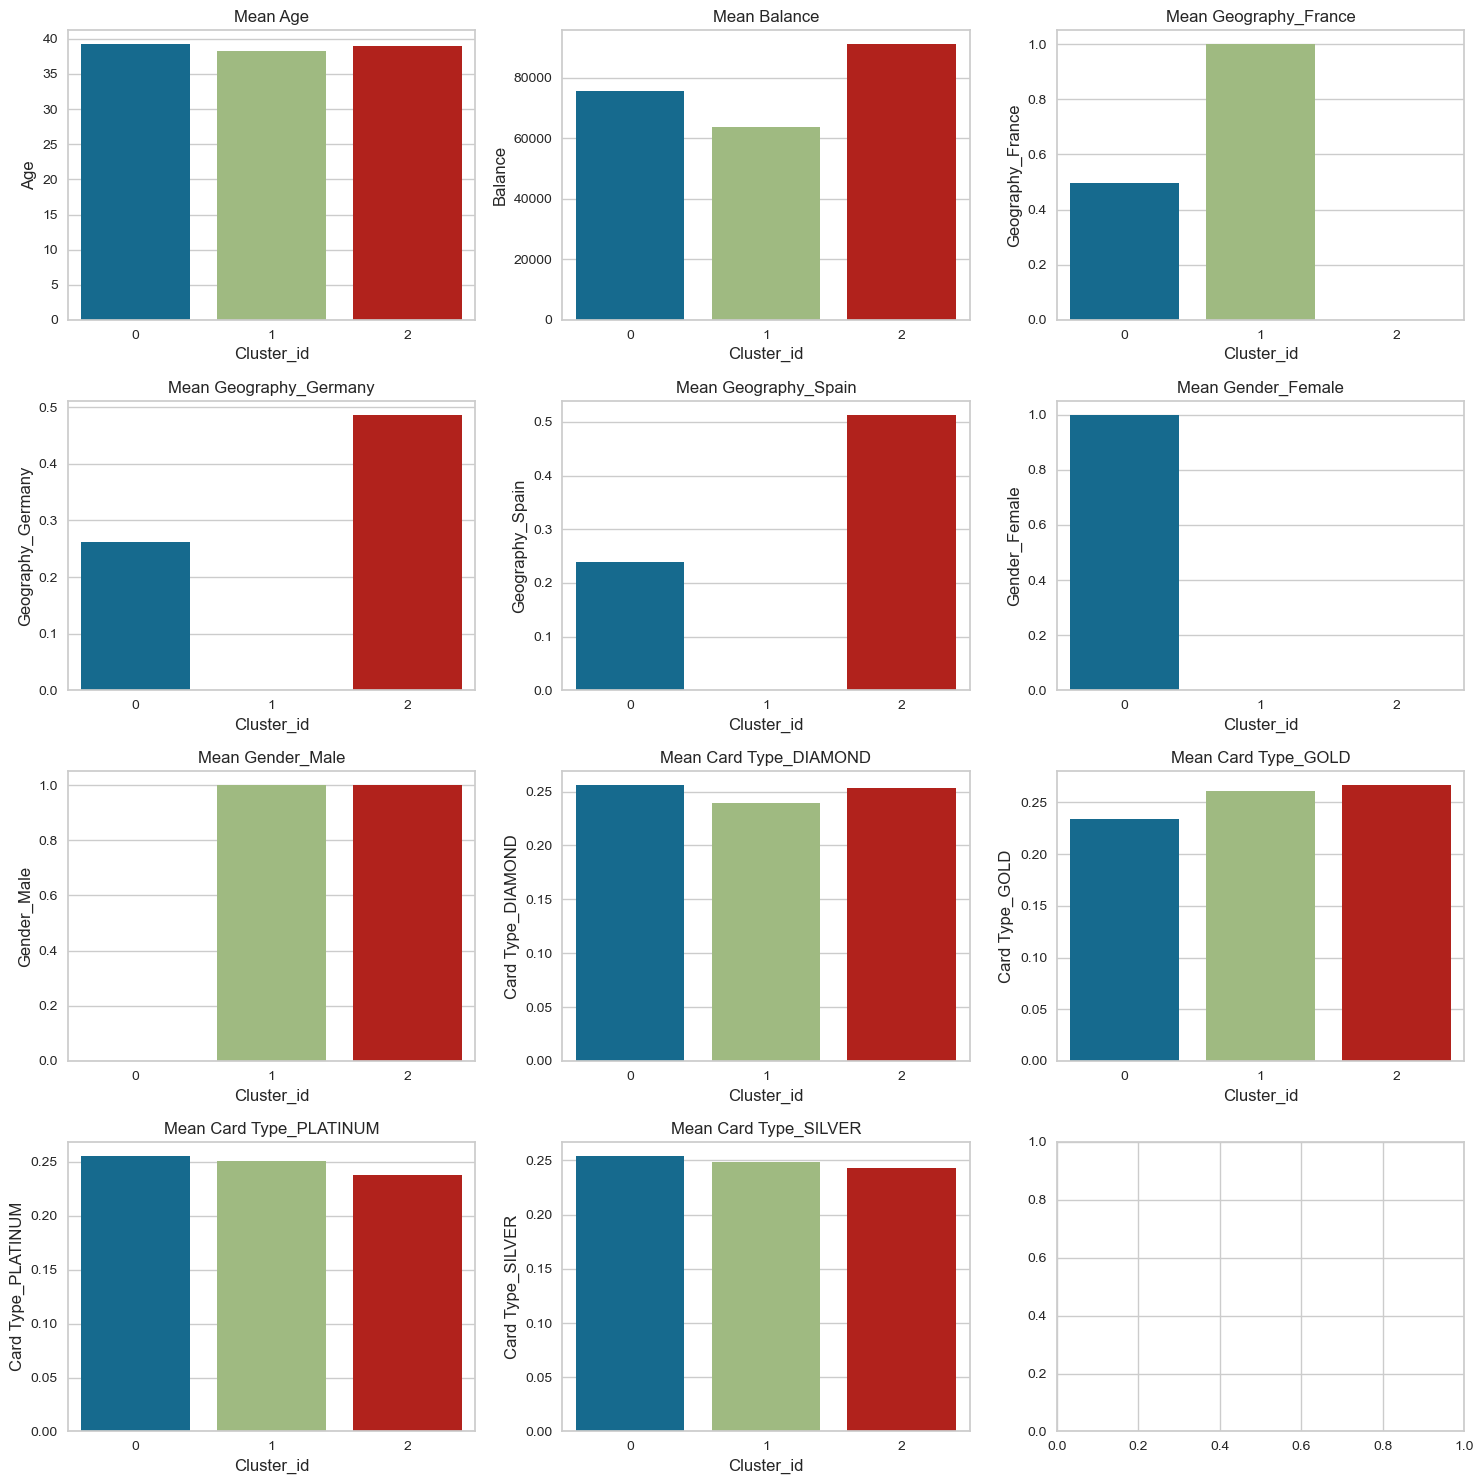

In [41]:
variables = ['Age', 'Balance', 'Geography_France', 'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male', 'Card Type_DIAMOND', 'Card Type_GOLD', 'Card Type_PLATINUM', 'Card Type_SILVER']

# Number of clusters
num_clusters = churn_copy_2['Cluster_id'].nunique()

# Define the number of rows and columns in the grid
num_rows = 4  # Adjust as needed
num_cols = 3  # Adjust as needed

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten the 2D array of subplots into a 1D array
axes = axes.flatten()

# Loop through variables and create subplots
for i, variable in enumerate(variables):
    sns.barplot(x="Cluster_id", y=variable, data=churn_copy_2, estimator='mean', ci=None, ax=axes[i])
    axes[i].set_title(f'Mean {variable}')

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plots
plt.show()


In [27]:
churn_copy_2['Exited'] = churn['Exited']

In [46]:
    for Cluster_id in range(0, cno):
        print("Group: ", Cluster_id)
        
        group_data = churn_copy_2[churn_copy_2["Cluster_id"] == Cluster_id]
       
        people_in_group = group_data.shape[0]
        
        print("\nExited: %.2f" % (group_data["Exited"].sum() / people_in_group))
        
        print("-------------------")

Group:  0

Exited: 0.25
-------------------
Group:  1

Exited: 0.13
-------------------
Group:  2

Exited: 0.20
-------------------


Since the variables are mostly equally distributed the results of k-means clustering are not very conclusive. This can also be seen through the Silhouette score of 0.142 suggesting that the clusters are not so well-defined and do not have a clear separation between them. Futhermore, the silhouette plots shows that the cluster are of different sizes and cluster 2 below the average silhouette score indicating sub-optimal clusters

##### Diverse Females
Cluster 0 has the highest number of customers, 4543 which comprises only of female customers with moderate credit scores (mean 650.83) and an average age of 39.24. They exhibit a relatively high balance (mean 75659.37) and a diverse distribution of credit card types, including Platinum, Diamond, Gold, and Silver. While their 50% of the customers are from France, and the rest from Germany, and Spain, Cluster 0 has a notably high exit rate of 25%, this renforces the earlier findings that female customers have a higher churn rate. 

##### French Gentlemen
In Cluster 1 there are 2753, all customers are males, and their credit scores average at 650.06, with an average age of 38.30. The financial behavior includes a moderate balance (mean 63546.28) and a slightly higher percentage of active members (52%). Geographically, Cluster 1 is exclusively composed of customers from France, and the exit rate is comparatively lower at 13%.

##### Dynamic European Elites
Cluster 2 consists of 2704 that include only male customers, with an average credit score of 650.49 and an average age of 39.03. These customers exhibit a relatively high balance (mean 91048.62) and a diverse distribution of credit card types. Geographically, the majority are from Germany and Spain. Cluster 2 has a moderate exit rate of 20%.

## Supervised Machine Learning Models

In [7]:
# Droping non-meaningful varibales and 'complain' as it has a 100% correlation with target variable - exited 
churn.drop(columns=['RowNumber', 'CustomerId', 'Surname'],axis=1,inplace=True)
churn.drop(['Complain'],axis=1,inplace=True)

In [8]:
label_encoder = LabelEncoder()
churn['Geography'] = label_encoder.fit_transform(churn['Geography'])
churn['Gender'] = label_encoder.fit_transform(churn['Gender'])
churn['Card Type'] = label_encoder.fit_transform(churn['Card Type'])

In [9]:
# Moving 'Exited' to last place
col = churn.pop('Exited')
churn.insert(13, col.name, col)
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  int32  
 2   Gender              10000 non-null  int32  
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Satisfaction Score  10000 non-null  int64  
 11  Card Type           10000 non-null  int32  
 12  Point Earned        10000 non-null  int64  
 13  Exited              10000 non-null  int64  
dtypes: float64(2), int32(3), int64(9)
memory usage: 976.7 KB


In [10]:
churn_features = churn.iloc[:,0:13] 
churn_labels = churn['Exited'] 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(churn_features, churn_labels, test_size = 0.20, random_state = 23)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create a logistic regression classifier
logistic_reg = LogisticRegression()

# Fit the model to the training data
logistic_model = logistic_reg.fit(X_train, y_train)

# Predict on the test data
logistic_preds = logistic_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, logistic_preds)

# Print accuracy
print("Accuracy Logistic Regression:", accuracy * 100)


Accuracy Logistic Regression: 79.35


#### Gradient Boosting Classifier 

In [43]:
GBclassifier = GradientBoostingClassifier(n_estimators=100,learning_rate=1, random_state=23)
GBmodel = GBclassifier.fit(X_train1, y_train1)
GBpreds = GBmodel.predict(X_test1)
print("Accuracy GradientBoost:", accuracy_score(y_test1, GBpreds) *100)

Accuracy GradientBoost: 84.65


In [45]:
estimator_GB = GradientBoostingClassifier()
nn_list=list(range(1,20))
print(nn_list)
parameters = {'learning_rate': [0.01, 0.02, 0.05, 0.07, 0.09, 0.1, 0.3, 0.5, 0.005],
              'n_estimators': [300, 500]
             }

grid_search_GB = GridSearchCV(estimator=estimator_GB, param_grid=parameters, scoring='accuracy', n_jobs=-1, cv=5)
GB_grid_search = grid_search_GB.fit(X_train1, y_train1)

#Print best parameter values
print(grid_search_GB.best_params_ ) 
bp = grid_search_GB.best_params_
#Mean cross-validated score of the best_estimator
print('Best Score GB:', grid_search_GB.best_score_ )

df = pd.DataFrame(grid_search_GB.cv_results_)
df1 = df[['params', 'mean_test_score']]
df1['params'][0]

# Now retrain with the best parameters
lr_val = bp['learning_rate']
est_val = bp['n_estimators']
BestGBclassifier = GradientBoostingClassifier(learning_rate=lr_val, n_estimators=est_val) 
BestGBmodel = BestGBclassifier.fit(X_train1, y_train1)
BestGBpreds = BestGBmodel.predict(X_test1)
print("Accuracy Best AB:", accuracy_score(y_test1, BestGBpreds) *100)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
{'learning_rate': 0.02, 'n_estimators': 300}
Best Score GB: 0.861
Accuracy Best AB: 86.6


Accuracy as increased from 84.6% to 86.6%

 Importing joblib to save the model.

In [ ]:
import joblib
joblib.dump(BestGBmodel, 'best_gradient_boosting_model.pkl')

Import tkinter to make front end application.

In [ ]:
import tkinter as tk
from tkinter import ttk
import joblib

# Load the saved model
loaded_model = joblib.load('best_gradient_boosting_model.pkl')

import numpy as np

def one_hot_encode(attributes):
    # 'Geography' is the second attribute and 'Gender' is the third attribute
    # Encode 'Geography'
    geography_map = {'France': 0, 'Germany': 1, 'Spain': 2}
    geography_encoded = geography_map[attributes[1]]

    # Encode 'Gender'
    gender_map = {'Male': 0, 'Female': 1}
    gender_encoded = gender_map[attributes[2]]

    # Encode 'Card Type' attribute
    card_type_index = 11  # Index of the 'Card Type' attribute
    card_type_map = {'Silver': 0, 'Gold': 1, 'Diamond': 2}
    card_type_encoded = card_type_map[attributes[card_type_index]]

    # Concatenate all encoded attributes
    attributes_encoded = np.concatenate((
        np.array([attributes[0]]),  # Credit Score
        np.array([geography_encoded]),
        np.array([gender_encoded]),
        np.array([attributes[3]]),  # Age
        np.array([attributes[4]]),  # Tenure
        np.array([attributes[5]]),  # Balance
        np.array([attributes[6]]),  # Number of Products
        np.array([attributes[7]]),  # Has Credit Card
        np.array([attributes[8]]),  # Is Active Member
        np.array([attributes[9]]),  # Estimated Salary
        np.array([attributes[10]]),  # Satisfaction Score
        np.array([card_type_encoded]),
        np.array([attributes[12]])  # Points Earned
    ), axis=None)

    # Return the modified attributes
    return attributes_encoded

def predict_churn(attributes):
    # One-hot encode categorical variables
    attributes_encoded = one_hot_encode(attributes)
    # Use the loaded model to make predictions
    predicted_churn = loaded_model.predict([attributes_encoded])
    return predicted_churn

# Define function to handle button click event
def predict():
    # Get attribute values from the input fields
    credit_score = float(credit_score_entry.get())
    geography = geography_combobox.get()
    gender = gender_combobox.get()
    age = float(age_entry.get())
    tenure = float(tenure_entry.get())
    balance = float(balance_entry.get())
    num_of_products = float(num_of_products_entry.get())
    has_cr_card = float(has_cr_card_combobox.get())
    is_active_member = float(is_active_member_combobox.get())
    estimated_salary = float(estimated_salary_entry.get())
    satisfaction_score = float(satisfaction_score_entry.get())
    card_type = card_type_combobox.get()
    point_earned = float(point_earned_entry.get())
        
    # Predict churn
    predicted_churn = predict_churn([credit_score, geography, gender, age, tenure, balance, num_of_products,
                                     has_cr_card, is_active_member, estimated_salary, satisfaction_score,
                                     card_type, point_earned])
    
    # Display prediction result
    if predicted_churn == 1:
        churn_label.config(text="Predicted churn: Yes", font=("Helvetica", 14, "bold"))
    else:
        churn_label.config(text="Predicted churn: No", font=("Helvetica", 14, "bold"))

# Create main application window
root = tk.Tk()
root.title("Customer Churn Prediction")

# Create labels and entry fields for attribute inputs
tk.Label(root, text="Credit Score:").grid(row=0, column=0)
credit_score_entry = tk.Entry(root)
credit_score_entry.grid(row=0, column=1, pady=5)

tk.Label(root, text="Geography:").grid(row=1, column=0)
geography_combobox = ttk.Combobox(root, values=['France', 'Germany', 'Spain'])
geography_combobox.grid(row=1, column=1, pady=5)

tk.Label(root, text="Gender:").grid(row=2, column=0)
gender_combobox = ttk.Combobox(root, values=['Male', 'Female'])
gender_combobox.grid(row=2, column=1, pady=5)

tk.Label(root, text="Age:").grid(row=3, column=0)
age_entry = tk.Entry(root)
age_entry.grid(row=3, column=1, pady=5)

tk.Label(root, text="Tenure:").grid(row=4, column=0)
tenure_entry = tk.Entry(root)
tenure_entry.grid(row=4, column=1, pady=5)

tk.Label(root, text="Balance:").grid(row=5, column=0)
balance_entry = tk.Entry(root)
balance_entry.grid(row=5, column=1, pady=5)

tk.Label(root, text="Number of Products:").grid(row=6, column=0)
num_of_products_entry = tk.Entry(root)
num_of_products_entry.grid(row=6, column=1, pady=5)

tk.Label(root, text="Has Credit Card:").grid(row=7, column=0)
has_cr_card_combobox = ttk.Combobox(root, values=['0', '1'])
has_cr_card_combobox.grid(row=7, column=1, pady=5)

tk.Label(root, text="Is Active Member:").grid(row=8, column=0)
is_active_member_combobox = ttk.Combobox(root, values=['0', '1'])
is_active_member_combobox.grid(row=8, column=1, pady=5)

tk.Label(root, text="Estimated Salary:").grid(row=9, column=0)
estimated_salary_entry = tk.Entry(root)
estimated_salary_entry.grid(row=9, column=1, pady=5)

tk.Label(root, text="Satisfaction Score:").grid(row=10, column=0)
satisfaction_score_entry = tk.Entry(root)
satisfaction_score_entry.grid(row=10, column=1, pady=5)

tk.Label(root, text="Card Type:").grid(row=11, column=0)
card_type_combobox = ttk.Combobox(root, values=['Gold', 'Silver','Diamond'])
card_type_combobox.grid(row=11, column=1, pady=5)

tk.Label(root, text="Points Earned:").grid(row=12, column=0)
point_earned_entry = tk.Entry(root)
point_earned_entry.grid(row=12, column=1, pady=5)

# Create button to predict churn
predict_button = tk.Button(root, text="Predict Churn", command=predict)
predict_button.grid(row=13, column=0, columnspan=2, pady=10)

# Label to display churn prediction result
churn_label = tk.Label(root, text="", font=("Helvetica", 14, "bold"))
churn_label.grid(row=14, column=0, columnspan=2)

# Start the GUI main loop
root.mainloop()
